In [1]:
import pandas as pd

In [2]:
import os

In [3]:
print(os.getcwd())

D:\development\ML Dev projects\Bank-Marketing-ML-Dev\notebooks


In [4]:
from pathlib import Path

# --- 1. Define project root directory ---
# Option A: Hard-code root directory (cleaner than hard-coding deep paths)
PROJECT_ROOT = Path(r"D:\development\ML Dev projects\Bank-Marketing-ML-Dev")

# Option B: Automatically detect root based on current notebook location
# PROJECT_ROOT = Path.cwd().parents[1]   # if notebooks/ is always 1 level under root

# --- 2. Define subdirectories relative to root ---
DATA_DIR = PROJECT_ROOT / "data" / "raw"

# --- 3. Example: Access a CSV inside data/raw ---
csv_file = DATA_DIR / "bank-full.csv"

print("Project Root:", PROJECT_ROOT)
print("Data Folder :", DATA_DIR)
print("CSV File    :", csv_file)


Project Root: D:\development\ML Dev projects\Bank-Marketing-ML-Dev
Data Folder : D:\development\ML Dev projects\Bank-Marketing-ML-Dev\data\raw
CSV File    : D:\development\ML Dev projects\Bank-Marketing-ML-Dev\data\raw\bank-full.csv


In [5]:
data = pd.read_csv(csv_file, sep=";", quotechar='"')

In [6]:
data.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
print(data.shape)

(45211, 17)


In [8]:
print("Deposit value counts ")
print(data['y'].value_counts())

Deposit value counts 
y
no     39922
yes     5289
Name: count, dtype: int64


In [9]:
print("\nDeposit value counts (proportion):")
print(data['y'].value_counts(normalize=True))


Deposit value counts (proportion):
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [10]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [12]:
from pandas.api.types import is_numeric_dtype, is_bool_dtype, is_object_dtype, is_categorical_dtype

In [13]:
def get_column_types(df, cat_threshold=10):
    categorical_cols = []
    numerical_cols = []
    binary_cols = []

    for col in df.columns:
        unique_vals = df[col].nunique()

        # ---- 1. Binary columns (True/False or 0/1 or Yes/No) ----
        if unique_vals == 2:
            binary_cols.append(col)
            continue

        # ---- 2. Categorical columns ----
        if (
            is_object_dtype(df[col]) or
            is_categorical_dtype(df[col]) or
            unique_vals < cat_threshold
        ):
            categorical_cols.append(col)
            continue

        # ---- 3. Numerical columns ----
        if is_numeric_dtype(df[col]):
            numerical_cols.append(col)

    return {
        "categorical": categorical_cols,
        "numerical": numerical_cols,
        "binary": binary_cols
    }

In [14]:
print(get_column_types(data))

{'categorical': ['job', 'marital', 'education', 'contact', 'month', 'poutcome'], 'numerical': ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 'binary': ['default', 'housing', 'loan', 'y']}


C:\Users\Falcon\AppData\Local\Temp\ipykernel_68036\1256582442.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_categorical_dtype(df[col]) or


In [16]:
print(data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

### Exploratory data analysis starts from here.

In [18]:
categorical = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary = ['default', 'housing', 'loan', 'y']

In [20]:
!pip install seaborn

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

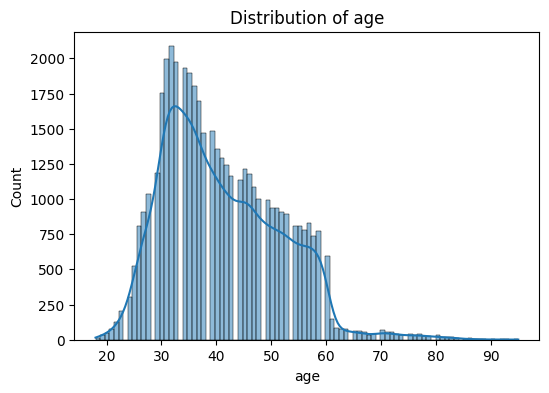

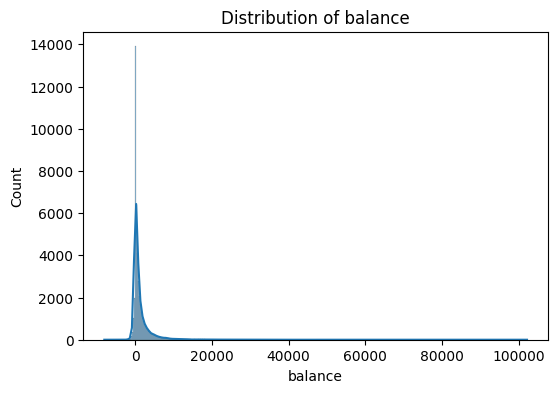

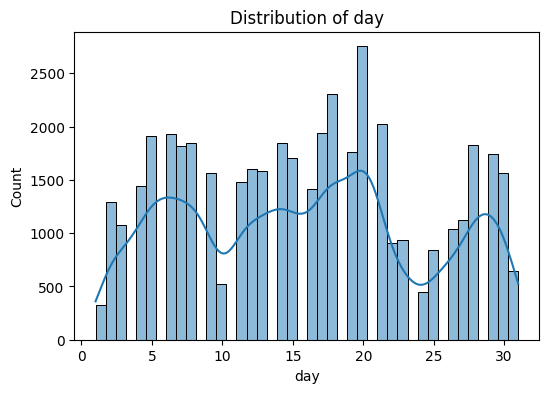

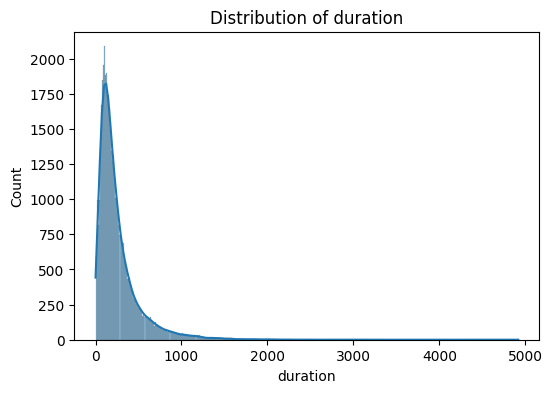

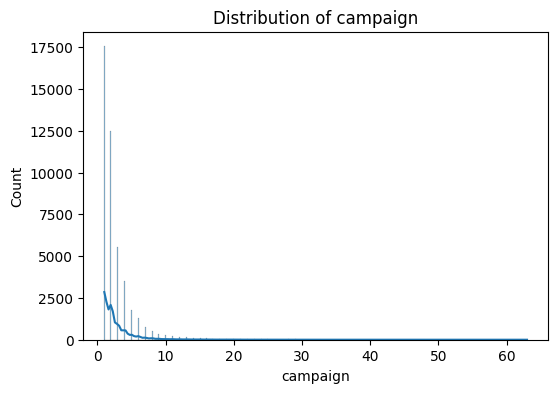

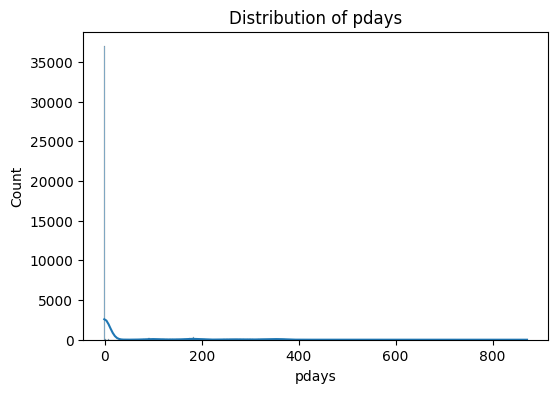

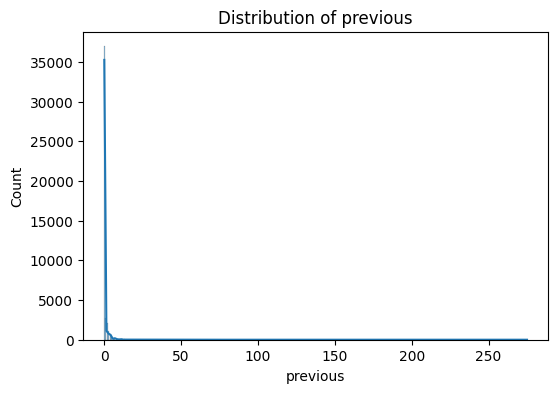

In [26]:
for col in numerical:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

1. age

📉 Observation from graph

Slightly right-skewed (tail toward older ages).

Most customers are between 30–50 years.

Very few above 60.

🎯 Inference

Marketing success may differ across age groups.

Older clients may behave differently in term deposits (more likely to invest).

We should check age vs y relationship later.

2. balance

📉 Observation

Extremely right-skewed.

Many clients have balance close to 0–2000.

Few clients have very high balances (outliers ~1 lakh+).

🎯 Inference

Must treat outliers (e.g., log transformation or capping).

Financial standing may impact term-deposit decision.

Check if higher balance → higher chance of subscription.

3. day

📉 Observation

Values distributed from 1–31 (day of month).

No strong pattern. Random spikes.

🎯 Inference

Day is not predictive — bank calls happen throughout the month.

Usually removed in final ML dataset because it has no predictive value.

4. duration

📉 Observation

Strong right-skew.

Many calls very short (0–200 seconds).

Some extremely long (2000–4000 sec).

🎯 Inference

Most important variable (strongest predictor in original UCI dataset).

Long-duration calls ⇒ more engaged customer ⇒ often “yes”.

⚠️ But:

This variable is available only after the call ends → cannot be used for pre-call prediction.

In real production systems, We will drop this feature.

5. campaign

📉 Observation

Mostly between 1–5.

Few cases with 10+ (outliers).

🎯 Inference

More attempts ≠ better conversion.

High number of attempts usually means customer is not interested.

Should handle outliers and maybe cap at 10.

6. pdays

📉 Observation

Very high spike at 999.

999 means "customer was never contacted previously".

For non-999 values, distribution is small and right-skewed.

🎯 Inference

999 must be treated specially:

Create a feature: contacted_before = 0/1.

Replace 999 with NaN or keep as separate category.

7. previous

📉 Observation

Most values = 0.

Very few had any previous marketing contact.

🎯 Inference

“Previous contact” is important:

If contacted earlier and outcome was positive → higher chance again.

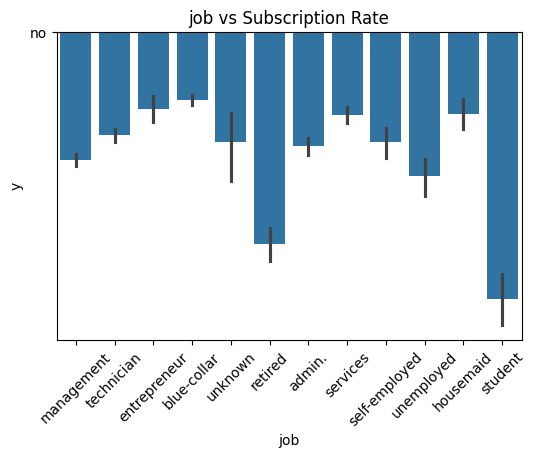

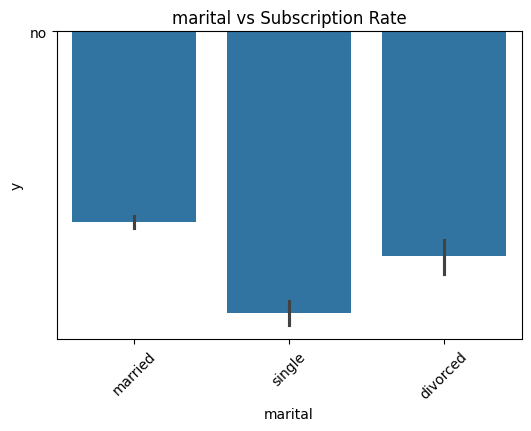

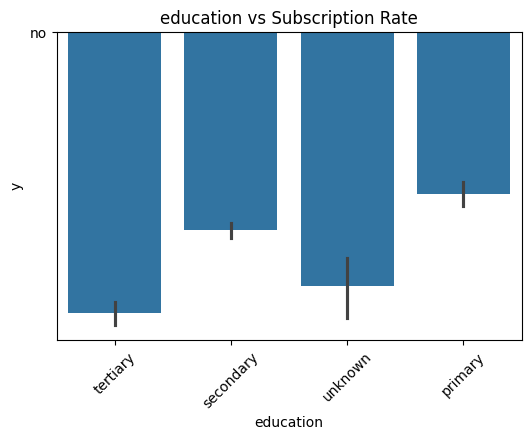

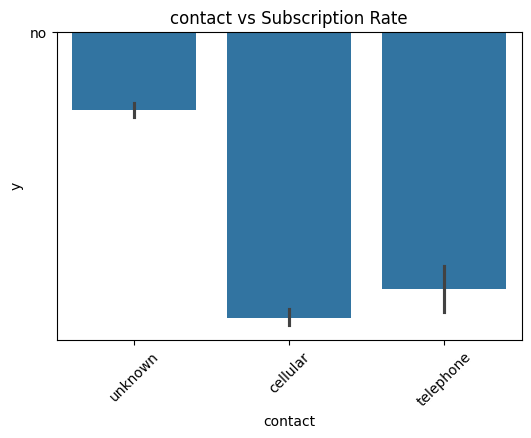

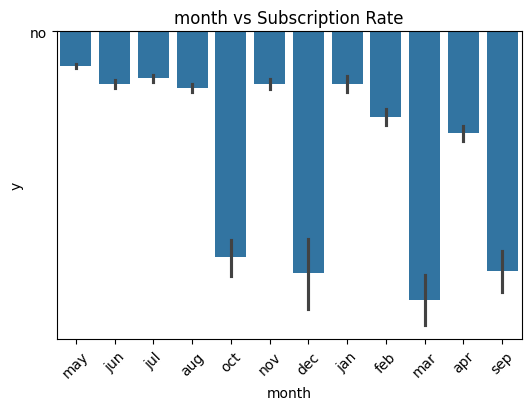

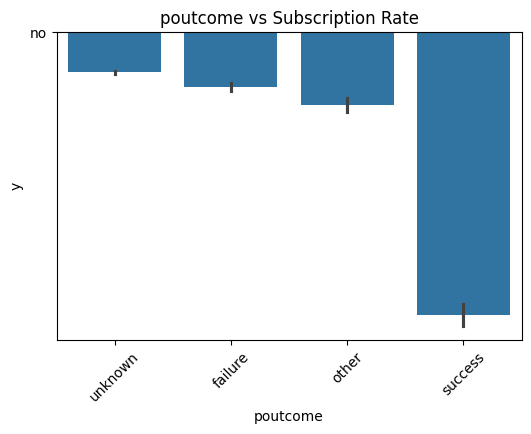

In [28]:
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.barplot(x=data[col], y=data['y'])
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Subscription Rate')
    plt.show()

📌 1. Month vs Subscription Rate

From our month plots:

🔍 Observations

Subscription rates are highest around months like March, September, and October.

Months like May, July, December show lower “yes” bars.

💡 Interpretation

Marketing campaigns run in certain months are more successful.

This may correspond to:

Salary cycles

Tax planning periods

When clients are more responsive

➡️ You should consider the month as an important feature.

📌 2. Poutcome vs Subscription Rate

(Outcome of previous marketing campaign)

🔍 Observations

Success category has a very large positive “yes” bar.

“Failure,” “other,” and “unknown” have very low positive sections.

💡 Interpretation

If a customer subscribed previously, they are highly likely to subscribe again.

This is the strongest signal among all categorical features.

➡️ poutcome is extremely important and predictive.

📌 3. Job vs Subscription Rate
🔍 Observations

Jobs like student, retired, and unemployed show relatively higher subscription rates.

Categories like blue-collar, services, and management show lower subscription rates.

💡 Interpretation

Retired and students may have more time to consider long-term financial investment.

Blue-collar workers usually have lower income predictability → less interest in long-term deposits.

➡️ Job type is a moderate predictor.

📌 4. Marital Status vs Subscription Rate
🔍 Observations

Single category typically shows a slightly higher “yes” bar.

Married and divorced categories are lower.

💡 Interpretation

Younger, single individuals may have more disposable income or willingness to invest.

➡️ Marital status is a weak to moderate signal.

📌 5. Education vs Subscription Rate
🔍 Observations

Tertiary education has the highest “yes” rate.

Primary education has the lowest.

💡 Interpretation

Higher education correlates with:

Better financial literacy

More interest in investment products

➡️ Education is a strong predictor.

📌 6. Contact Type vs Subscription Rate
🔍 Observations

Cellular contact shows significantly higher “yes” rates.

Telephone contact shows very low subscription success.

💡 Interpretation

Cellular outreach is more effective → customers respond better.

Landline users may be older or less willing to engage.

➡️ Contact type directly affects campaign success.

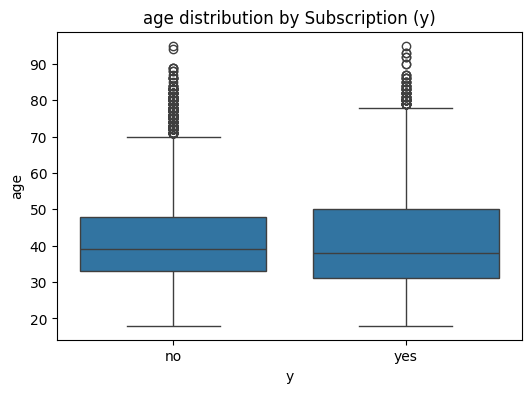

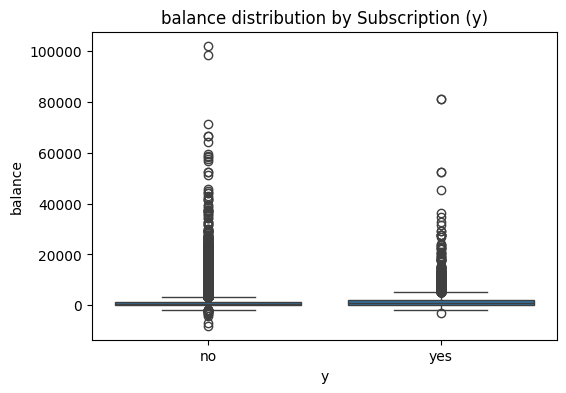

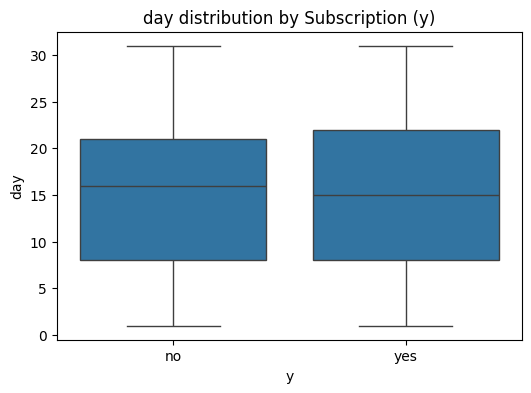

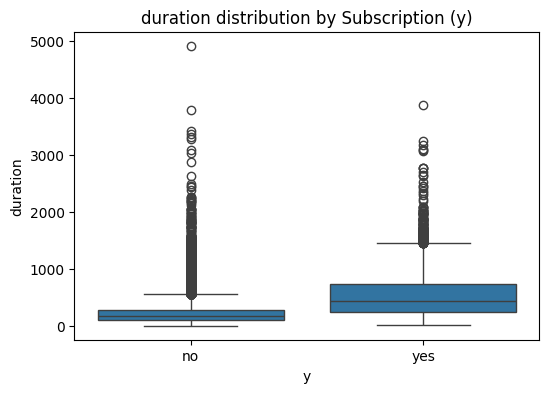

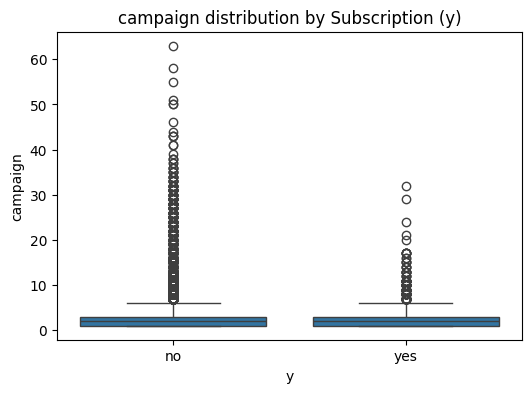

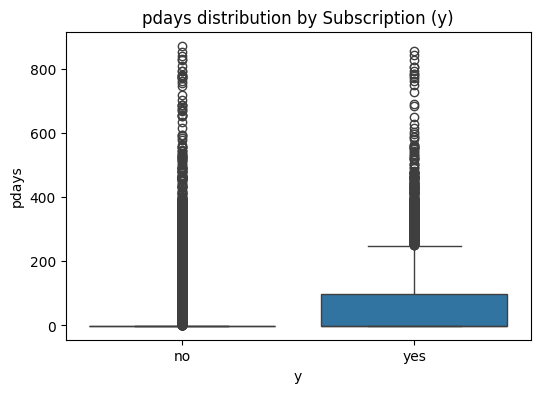

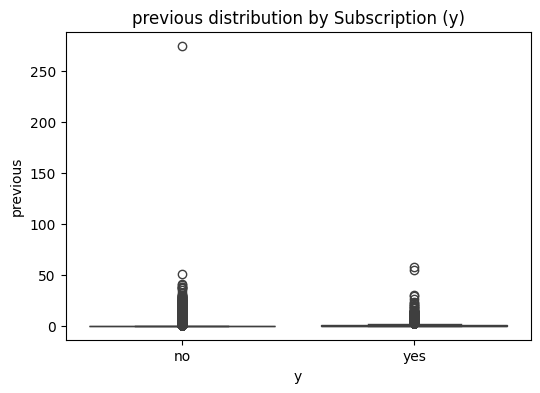

In [30]:
for col in numerical:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data['y'], y=data[col])
    plt.title(f'{col} distribution by Subscription (y)')
    plt.show()

C:\Users\Falcon\AppData\Local\Temp\ipykernel_68036\1848189655.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[binary] = data[binary].applymap(lambda x: binary_map.get(x, x))


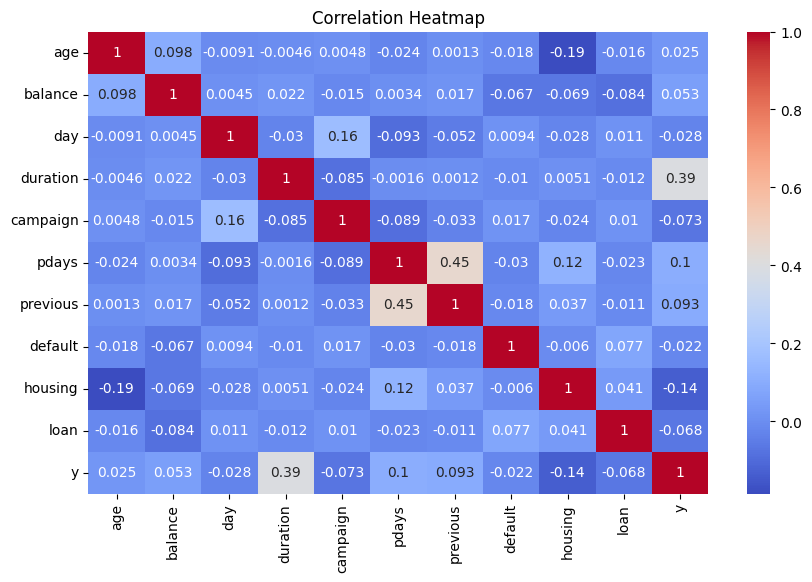

In [33]:
binary_map = {"yes": 1, "no": 0}
data[binary] = data[binary].applymap(lambda x: binary_map.get(x, x))

plt.figure(figsize=(10,6))
sns.heatmap(data[numerical + binary].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()